$$Task 2 : Social media sentiment$$
- analysics
- Use a dataset of tweets or Facebook posts and
- perform sentiment analysis to determine the
- overall sentiment of the posts.

'''Sentiment analysis, also known as opinion mining, is the process of using␣
↪natural language processing (NLP) techniques
to determine the sentiment or emotional tone expressed in text data.
When applied to social media data, sentiment analysis can provide valuable␣
↪insights into public opinion, customer feedback,
brand perception, and more. Here's a brief overview of sentiment analysis using␣
↪social media data:
'''

'''Use a dataset of tweets or Facebook posts and
perform sentiment analysis to determine the
overall sentiment of the posts.'''

- Packages required for the analysis
- nltk: natural language tool kit used for text analysis
- pandas : used for anlayse dataframe
- matplotlib and seborn: used for plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
!pip install vaderSentiment

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vadde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
cd="G:\\projects\\intenship\\sentimental analysis\\Tweets.csv"
df=pd.read_csv(cd)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

In [6]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [7]:
cat=[]
num=[]
data=dict(df.dtypes)
for i in data:
    if data[i]=='O':
        cat.append(i)
    else:
        num.append(i)
print('Catgorical Data:-{}'.format(cat))   
print('--------------------------------')
print('Numerical Data:-{}'.format(num))

Catgorical Data:-['airline_sentiment', 'negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
--------------------------------
Numerical Data:-['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']


In [8]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# filling missing values for numerical terms
for i in num:
    df[i].fillna(df[i].median(),inplace=True)
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence           0
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
# filling missing values for Catgorical terms
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [11]:
print(df.shape)


(14640, 15)


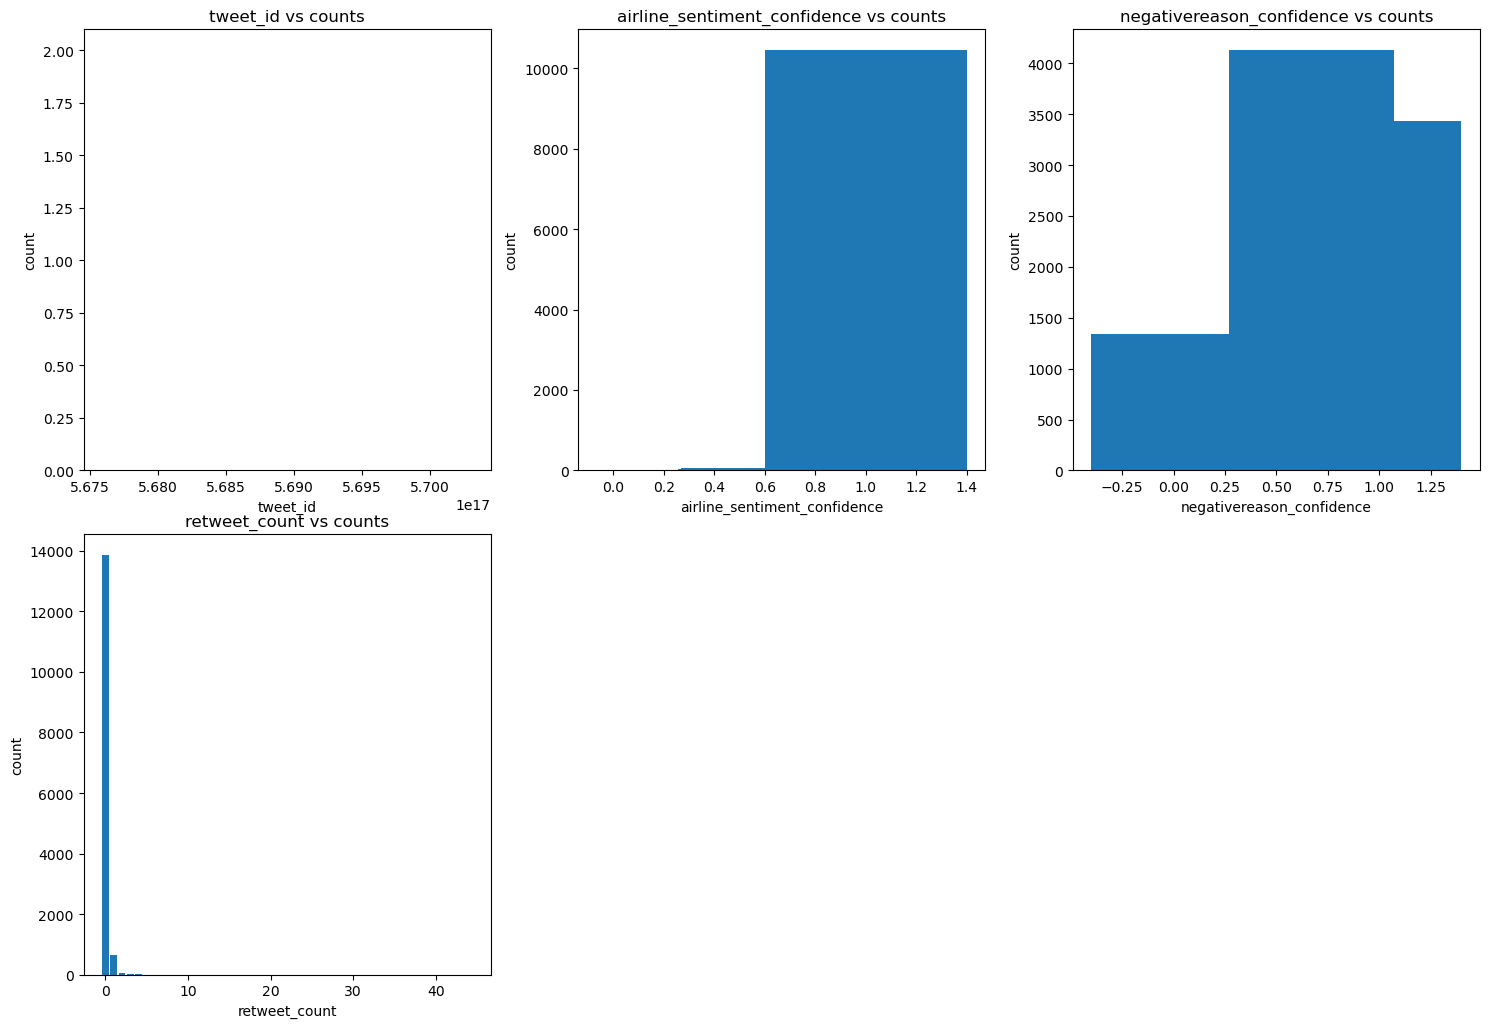

In [12]:
plt.figure(figsize=(15,15))
for i in range(len(num)):
    a=df[num[i]].value_counts()
    b=a.keys()
    c=a.values
    file=pd.DataFrame(zip(b,c),columns=[num[i],'count'])
    plt.subplot(3,3,i+1)
    plt.bar(file[num[i]],file['count'])
    
    plt.title('{} vs counts'. format(num[i]))
    plt.xlabel(num[i])
    plt.ylabel('count')
    plt.tight_layout(h_pad=0,w_pad=1)

    

Text(0.5, 1.0, 'Graph-1-Airline Sentiment Distribution')

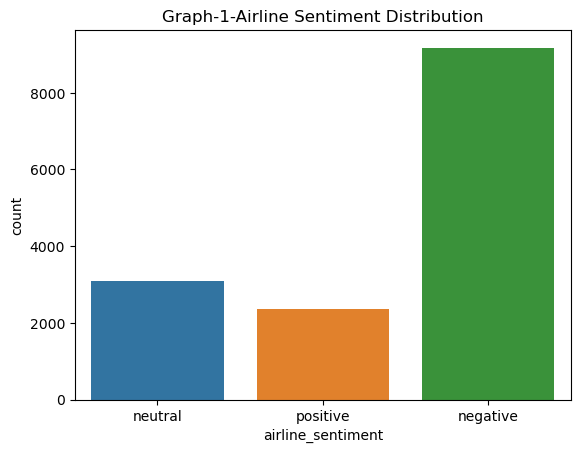

In [13]:
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1-Airline Sentiment Distribution')

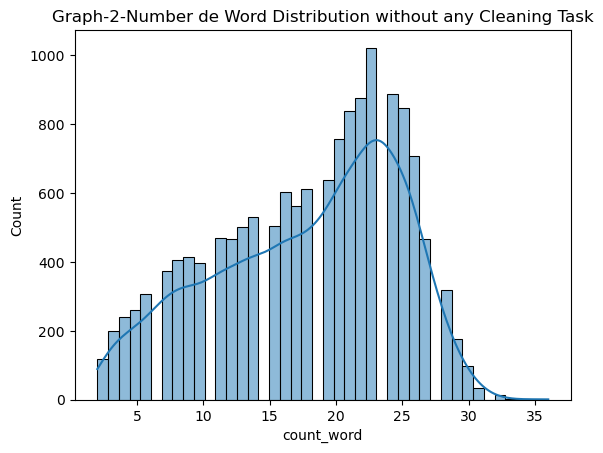

In [14]:
df['count_word'] = df['text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='count_word',kde=True)
plt.title('Graph-2-Number de Word Distribution without any Cleaning Task')
plt.show()

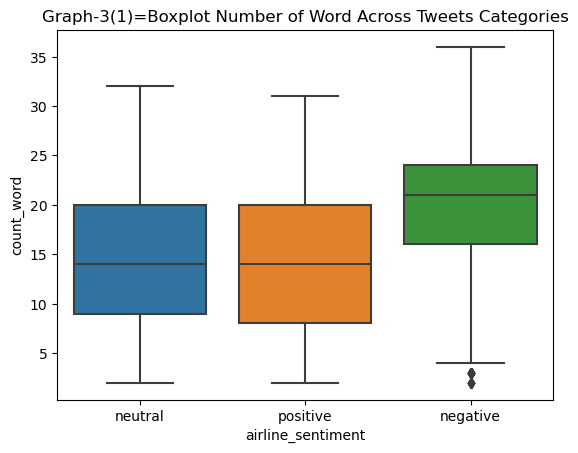

In [15]:
sns.boxplot(data = df , y='count_word',x='airline_sentiment')
plt.title('Graph-3(1)=Boxplot Number of Word Across Tweets Categories')
plt.show()

In [16]:
df.loc[np.logical_or(df['count_word']>35,df['count_word']<=5),:]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,count_word
0,570306133677760513,neutral,1.0000,Customer Service Issue,0.6706,Virgin America,negative,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),4
14,570285904809598977,positive,1.0000,Customer Service Issue,0.6706,Virgin America,negative,sjespers,Customer Service Issue,0,@VirginAmerica Thanks!,"[0.0, 0.0]",2015-02-24 10:15:29 -0800,"San Francisco, CA",Pacific Time (US & Canada),2
18,570270684619923457,positive,1.0000,Customer Service Issue,0.6706,Virgin America,negative,thebrandiray,Customer Service Issue,0,I ❤️ flying @VirginAmerica. ☺️👍,"[0.0, 0.0]",2015-02-24 09:15:00 -0800,Somewhere celebrating life.,Atlantic Time (Canada),5
46,570011341483843584,neutral,0.6799,Customer Service Issue,0.6706,Virgin America,negative,vacations7,Customer Service Issue,0,@VirginAmerica DREAM http://t.co/oA2dRfAoQ2 h...,"[0.0, 0.0]",2015-02-23 16:04:28 -0800,Turks and caicos,Eastern Time (US & Canada),5
58,569990163209850881,neutral,0.7007,Customer Service Issue,0.6706,Virgin America,negative,giffgaffman,Customer Service Issue,0,@VirginAmerica @ladygaga @carrieunderwood - Ca...,"[0.0, 0.0]",2015-02-23 14:40:19 -0800,"UK, USA.",Eastern Time (US & Canada),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14312,569636551321194497,positive,1.0000,Customer Service Issue,0.6706,American,negative,SarahM0en,Customer Service Issue,0,@AmericanAir awesome! Thx,"[0.0, 0.0]",2015-02-22 15:15:11 -0800,Nashville TN,Central Time (US & Canada),3
14314,569636064035348480,negative,1.0000,Flight Booking Problems,0.6541,American,negative,jtotheizzoe,Customer Service Issue,0,"@AmericanAir yes, and rebooked incorrectly.","[0.0, 0.0]",2015-02-22 15:13:15 -0800,"Austin, TX",Central Time (US & Canada),5
14443,569615540089700353,neutral,1.0000,Customer Service Issue,0.6706,American,negative,HertzOnMyCouch,Customer Service Issue,0,@AmericanAir hi how are you,"[0.0, 0.0]",2015-02-22 13:51:42 -0800,hertz's couch,Eastern Time (US & Canada),5
14600,569592981742878721,neutral,0.6521,Customer Service Issue,0.6706,American,negative,EricRoberts,Customer Service Issue,0,http://t.co/EIw2sYb8Fu roberts&amp;s=1 @Americ...,"[0.0, 0.0]",2015-02-22 12:22:04 -0800,"Los Angeles, CA",Pacific Time (US & Canada),3


Preprocessing the data:
Punctuation Removal
StopWord Removal
Numeric Values Removal
Stemming
Tokenization

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [18]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)
#stopword removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filter_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filter_tokens)
#remove numeric
def remove_numeric(text):
    return re.sub(r'\d+','',text)
#Stemming
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)
def remove_mentions(text):
    return re.sub(r'@\w+','',text)

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)
    input_text = "walking throw the street, a passenger walked toward me, talking␣about a walked chicken on the streets"
    stemmed_text = apply_stemming(input_text)
    print(stemmed_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vadde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
apply_stemming('walking throw the street , a passenger walked toward me␣talking about a walked chicken on the streets')

'walk throw the street , a passeng walk toward me␣talk about a walk chicken on the street'

In [21]:
def text_preprocessing(text):
    sentence = remove_mentions(text)
    sentence = remove_punctuation(sentence)
    sentence = remove_stopwords(sentence)
    sentence = remove_numeric(sentence)
    sentence = apply_stemming(sentence)
    return sentence

In [22]:
text_preprocessing('walking throw the street , a passenger walked toward me,talking about a walked chicken on the streets')

'walk throw street passeng walk toward metalk walk chicken street'

In [23]:
df.loc[:,'new_text'] = df['text'].apply(lambda x : text_preprocessing(x))

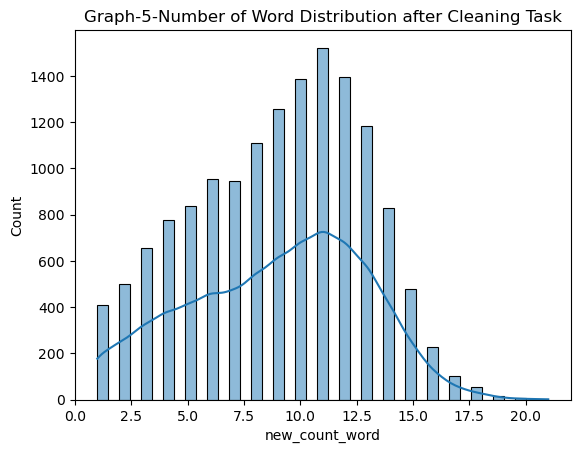

In [24]:
df.loc[:,'new_count_word'] = df['new_text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='new_count_word',kde=True)
plt.title('Graph-5-Number of Word Distribution after Cleaning Task')
plt.show()

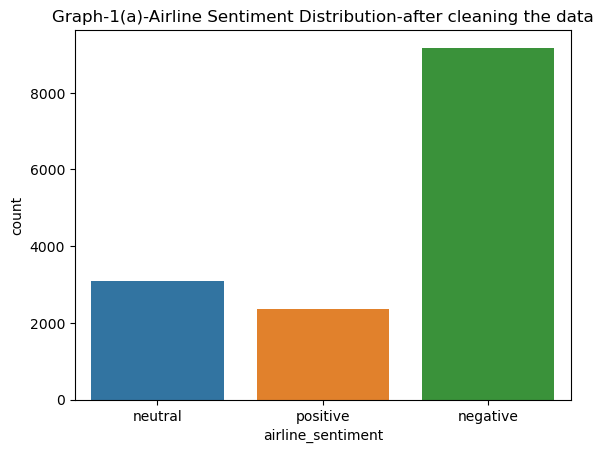

In [25]:
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1(a)-Airline Sentiment Distribution-after cleaning the data')
plt.show()

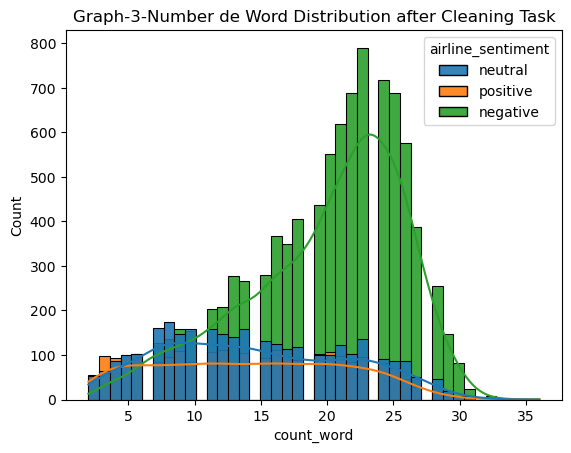

In [26]:
sns.histplot(data = df , x='count_word',hue='airline_sentiment',alpha=0.9,kde=True)
plt.title('Graph-3-Number de Word Distribution after Cleaning Task')
plt.show()